In [72]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt

from numpy import arange
from numpy import exp
from numpy import sqrt
from numpy import cos
from numpy import e
from numpy import pi

In [124]:
def levy( x ):
    x = np.asarray_chkfinite(x)
    n = len(x)
    z = 1 + (x - 1) / 4
    return (sin( pi * z[0] )**2
        + sum( (z[:-1] - 1)**2 * (1 + 10 * sin( pi * z[:-1] + 1 )**2 ))
        +       (z[-1] - 1)**2 * (1 + sin( 2 * pi * z[-1] )**2 ))
levy([1,1,1,1,1,1,1,1,8])

def ackley(x):
    return -20.0 * exp(-0.2 * sqrt(0.5 * (x[0]**2 + x[1]**2)))-exp(0.5 * (cos(2 *pi * x[0])+cos(2 * pi * x[1]))) + e + 20
def rastrigin(X):
    A = 10
    return A * len(X) + sum([(x**2 - A * np.cos(2 * pi * x)) for x in X])

In [99]:
class Organism:
    def __init__(self,location,direction,health_decay,loss):
        self.direction=direction
        self.location=location
        self.health=1
        self.health_decay=health_decay
        self.speed=0.001
        self.average_return=0
        self.gamma=0.70
        self.loss=loss(self.location)
    
    def reduceStamina(self,health_decay):
        self.health*=health_decay
        if self.health<0.01:
            return True
        return False
    
    def move(self,loss):
        difference=self.loss-loss(self.location +self.direction)
        self.location +=self.direction
#         self.acceleration(difference)
#         self.direction+=self.speed*self.direction
        self.average_return=self.average_return + self.gamma*difference
        self.change_direction()
        self.loss=loss(self.location)
        return self.reduceStamina(self.health_decay)

    def change_direction(self):
        if self.average_return<0:
            randomness_scale=np.interp(1-self.health, (0, 1), (0.0005, 0.1))
            direction_change=np.random.laplace(loc=0,scale=randomness_scale,size=2)
            self.direction+=direction_change
#             self.direction[random.choice(np.arange(self.direction.size))]+=direction_change
        else:
            self.health+=0.05*self.health
    
    def acceleration(self,difference):
        if difference>0:
            self.speed*=0.9
        else:
            self.speed*=1.1
    def clone(self):
        self.health=1
        return self.location

In [100]:
    def offspting_cunductor():
        direction=np.zeros(2)
        direction[random.choice(np.arange(direction.size))]=random.uniform(-0.07, + 0.07,size=1)
        return direction

iteration:0 population size:50 best location:   loss:4.234178110816291
iteration:1 population size:105 best location:   loss:0.4715865269928528
iteration:2 population size:160 best location:   loss:0.11563432831338444
iteration:3 population size:215 best location:   loss:0.11563432831338444
iteration:4 population size:270 best location:   loss:0.10595245042311223
iteration:5 population size:325 best location:   loss:0.09159786124016349
iteration:6 population size:380 best location:   loss:0.06872122121804694
iteration:7 population size:435 best location:   loss:0.06872122121804694
iteration:8 population size:490 best location:   loss:0.06872122121804694
iteration:9 population size:545 best location:   loss:0.06872122121804694
iteration:10 population size:600 best location:   loss:0.06872122121804694
iteration:11 population size:655 best location:   loss:0.06872122121804694
iteration:12 population size:710 best location:   loss:0.06872122121804694
iteration:13 population size:765 best l

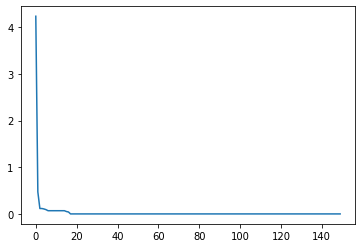

In [127]:
loss_function=rastrigin
initial_population=50
population=[]
initial_locations=[random.uniform(-4, +4,size=2) for i in range(initial_population)]
initial_directions=[random.uniform(-0.1, +0.1,size=2) for i in range(initial_population)]
health_decay=0.95
for l,d in zip(initial_locations,initial_directions):
    population.append(Organism(l,d,health_decay,loss_function))
population.sort(key=lambda organism: organism.loss)
rounds=150
elites=[]
for r in range(rounds):
    spring_counts=10
    dead_flag=[]
    offsprings=[]
    population.sort(key=lambda organism: organism.loss)
    elites.append(population[0].loss)
    print(f"iteration:{r} population size:{len(population)} best location:   loss:{population[0].loss}")#{population[0].location}
    for organism in population:
        if spring_counts>0:
            base_location=organism.clone()
            for i in range(spring_counts):
                offsprings.append(Organism(base_location,offspting_cunductor(),health_decay,loss_function))
            spring_counts-=1
            dead_flag.append(False)
        else:
            dead_flag.append(organism.move(levy))
    dead_flag=np.where(np.array(dead_flag, dtype=bool)==True)
    population=[i for j, i in enumerate(population) if j not in dead_flag[0]] + offsprings
plt.plot(elites)

240218


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Passing normed=False is deprecated, and has no effect. Consider passing the density argument instead.
  from ipykernel import kernelapp as app


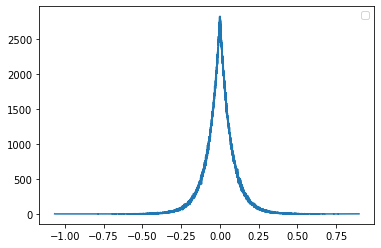

In [11]:
import matplotlib.pyplot as plt


# plt.plot(rand)
# plt.show()

# rand=np.random.exponential(scale=0.07,size=(2000000,1))
rand=np.random.laplace(loc=0,scale=0.07,size=(2000000,1))
j=0
for r in rand:
    if r>0.1:
        j+=1
print(j)
plt.figure()
number_density, radii = np.histogram(rand, bins=10000,normed=False)
plt.plot(radii[0:-1], number_density)
# P.ylim(0, central_surface_density)
plt.legend()      
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


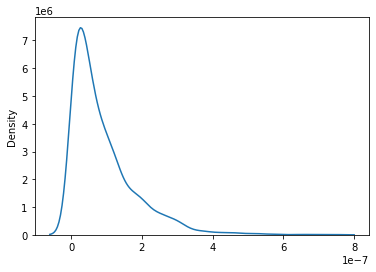

In [6]:

import seaborn as sns

sns.distplot(random.exponential(scale=0.00000009,size=2000), hist=False)

plt.show() 